In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


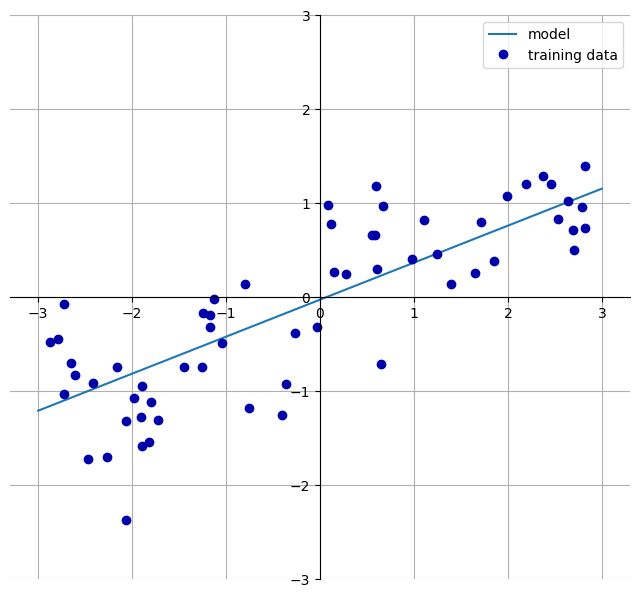

In [2]:
mglearn.plots.plot_linear_regression_wave()

Linear Regression (Ordinary Least Squares)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"Coof: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

print(f"Test Score: {lr.score(X_test, y_test)}")
print(f"Train Score: {lr.score(X_train, y_train)}")

Coof: [0.39390555]
Intercept: -0.031804343026759746
Test Score: 0.65933685968637
Train Score: 0.6700890315075756


Data set with more Features

In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr.fit(X_train, y_train)

# print(f"Coof: {lr.coef_}")
# print(f"Intercept: {lr.intercept_}")

print(f"Train Score: {lr.score(X_train, y_train)}")
print(f"Test Score: {lr.score(X_test, y_test)}")

Train Score: 0.9520519609032728
Test Score: 0.6074721959665788


Ridge Regression

In [5]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"Train Score: {rr.score(X_train, y_train)}")
print(f"Test Score: {rr.score(X_test, y_test)}")

Train Score: 0.9282273685001986
Test Score: 0.7722067936479649


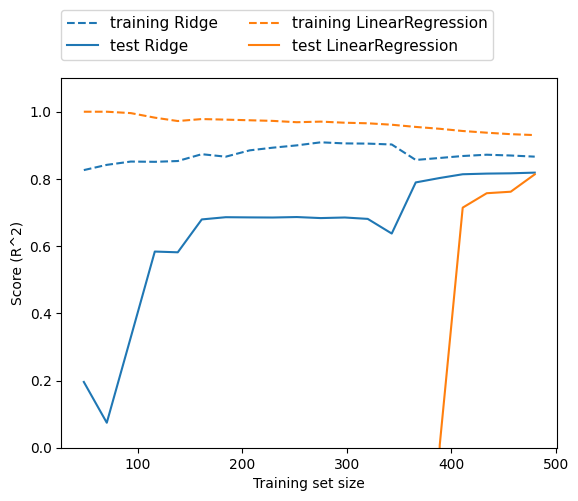

In [6]:
mglearn.plots.plot_ridge_n_samples()

Lassso Regression

In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"Train Score: {lasso.score(X_train, y_train)}")
print(f"Test Score: {lasso.score(X_test, y_test)}")
print(f"Nb of Fe: {np.sum(lasso.coef_ != 0)}")

Train Score: 0.29323768991114607
Test Score: 0.20937503255272294
Nb of Fe: 4


In [8]:
lasso001 = Lasso(alpha=0.01, max_iter=100_000)
lasso001.fit(X_train, y_train)
print(f"Train Score: {lasso001.score(X_train, y_train)}")
print(f"Test Score: {lasso001.score(X_test, y_test)}")
print(f"Nb of Fe: {np.sum(lasso001.coef_ != 0)}")

Train Score: 0.8962226511086497
Test Score: 0.7656571174549982
Nb of Fe: 33


Classification with linear models

c:\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


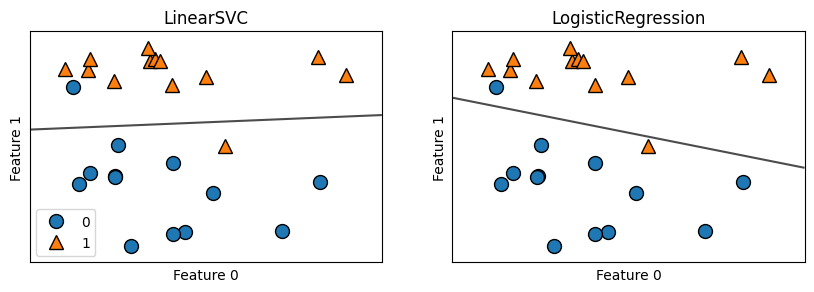

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()


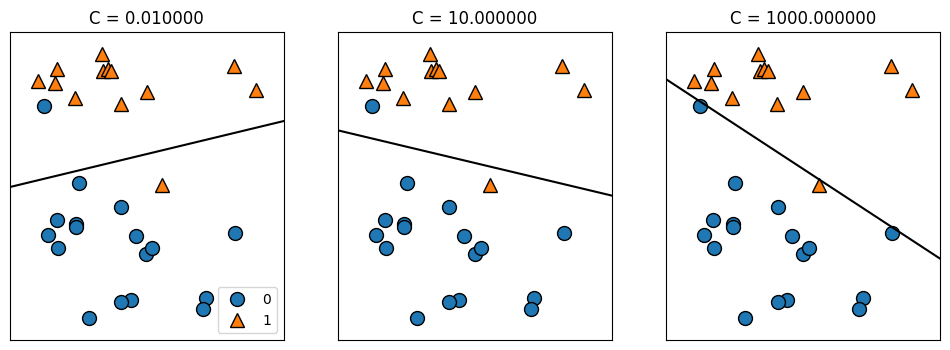

In [10]:
mglearn.plots.plot_linear_svc_regularization()

Testing linearLogistic

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
# print(cancer.keys())
# print(cancer["target"])
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], stratify=cancer["target"], random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

# print(f"Score: {logreg.score(X_train, y_train)}")
# print(f"Score: {logreg.score(X_test, y_test)}")

logreg100 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f"LOGREG100 train: {logreg100.score(X_train, y_train)}")
print(f"LOGREG100 test: {logreg100.score(X_test, y_test)}")

LOGREG100 train: 0.9342723004694836
LOGREG100 test: 0.9300699300699301


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mulitclass Classification


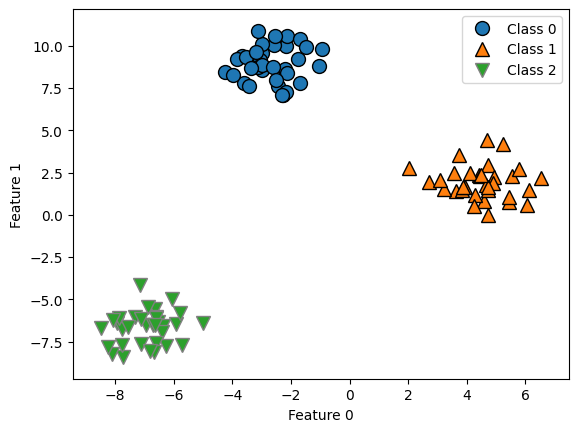

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
# display(X)
# display(y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [13]:
linear_svm = LinearSVC().fit(X, y)
display(f"Shape of coof: {linear_svm.coef_.shape}")
display(f"Shape of intercept: {linear_svm.intercept_.shape}")

c:\Python\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


'Shape of coof: (3, 2)'

'Shape of intercept: (3,)'

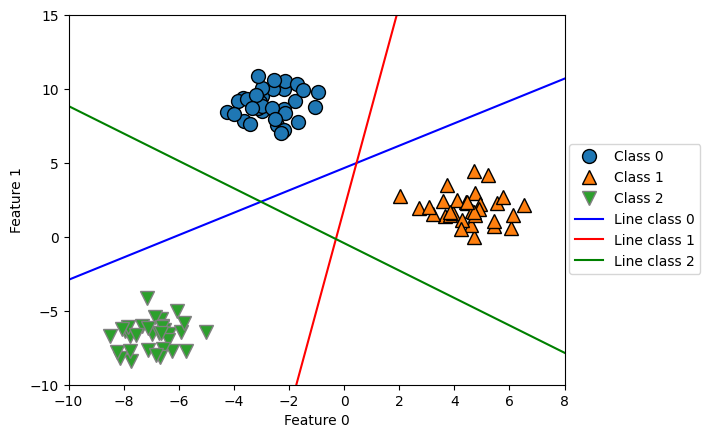

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))


Text(0, 0.5, 'Feature 1')

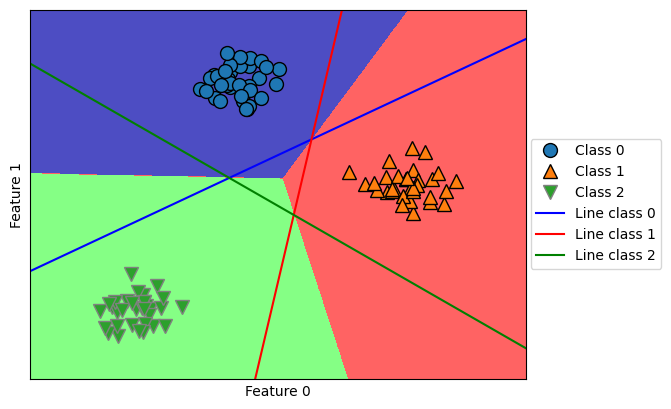

In [15]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")